<a href="https://colab.research.google.com/github/sherrywilly/travel-ease-case-study/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_excel('sales_data.xlsx')

In [53]:
df.head()

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,NaN,Credit Card,North
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200.0,Cash,South
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100.0,PayPal,West
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500.0,Debit Card,East
4,1005,2024-02-08,C005,Book,Books,3,20,60.0,Credit Card,North


In [54]:
df.columns

Index(['Transaction_ID', 'Date', 'Customer_ID', 'Product', 'Category',
       'Quantity', 'Price', 'Total_Amount', 'Payment_Method', 'Region'],
      dtype='object')

In [55]:
df.shape

(20, 10)

The dataset have 20 records and 10 columns

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  20 non-null     int64  
 1   Date            20 non-null     object 
 2   Customer_ID     20 non-null     object 
 3   Product         20 non-null     object 
 4   Category        20 non-null     object 
 5   Quantity        20 non-null     int64  
 6   Price           20 non-null     int64  
 7   Total_Amount    19 non-null     float64
 8   Payment_Method  20 non-null     object 
 9   Region          20 non-null     object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.7+ KB


seems like one of the value in total amount seems missing . we got quanitity and price anyway so we can evaluate and fill it using quanity * price

In [57]:
df.describe()

,Transaction_ID,Quantity,Price,Total_Amount
count,20.00000,20.000000,20.000000,19.000000
mean,1010.50000,1.550000,325.500000,375.263158
std,5.91608,0.887041,302.484884,389.067524
min,1001.00000,1.000000,20.000000,25.000000
25%,1005.75000,1.000000,43.750000,77.500000
50%,1010.50000,1.000000,200.000000,200.000000
75%,1015.25000,2.000000,600.000000,550.000000
max,1020.00000,4.000000,800.000000,1200.000000


In [58]:
df.isnull().sum()

,0
Transaction_ID,0
Date,0
Customer_ID,0
Product,0
Category,0
Quantity,0
Price,0
Total_Amount,1
Payment_Method,0
Region,0


In [59]:
df.dtypes

,0
Transaction_ID,int64
Date,object
Customer_ID,object
Product,object
Category,object
Quantity,int64
Price,int64
Total_Amount,float64
Payment_Method,object
Region,object


In [60]:
df.duplicated().sum()

np.int64(0)

No duplicate records found

In [61]:
df['Total_Amount'] = df['Total_Amount'].fillna(df['Price'] * df['Quantity'])

In [62]:
df.head()

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,800.0,Credit Card,North
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200.0,Cash,South
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100.0,PayPal,West
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500.0,Debit Card,East
4,1005,2024-02-08,C005,Book,Books,3,20,60.0,Credit Card,North


In [63]:
df.isnull().sum()

,0
Transaction_ID,0
Date,0
Customer_ID,0
Product,0
Category,0
Quantity,0
Price,0
Total_Amount,0
Payment_Method,0
Region,0


In [64]:
df['Date'] = pd.to_datetime(df['Date'])

In [65]:
df.head()

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,800.0,Credit Card,North
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200.0,Cash,South
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100.0,PayPal,West
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500.0,Debit Card,East
4,1005,2024-02-08,C005,Book,Books,3,20,60.0,Credit Card,North


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Transaction_ID  20 non-null     int64         
 1   Date            20 non-null     datetime64[ns]
 2   Customer_ID     20 non-null     object        
 3   Product         20 non-null     object        
 4   Category        20 non-null     object        
 5   Quantity        20 non-null     int64         
 6   Price           20 non-null     int64         
 7   Total_Amount    20 non-null     float64       
 8   Payment_Method  20 non-null     object        
 9   Region          20 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 1.7+ KB


In [67]:
df.describe()

,Transaction_ID,Date,Quantity,Price,Total_Amount
count,20.00000,20,20.000000,20.000000,20.000000
mean,1010.50000,2024-03-30 06:00:00,1.550000,325.500000,396.500000
min,1001.00000,2024-01-05 00:00:00,1.000000,20.000000,25.000000
25%,1005.75000,2024-02-09 12:00:00,1.000000,43.750000,78.750000
50%,1010.50000,2024-04-03 00:00:00,1.000000,200.000000,200.000000
75%,1015.25000,2024-05-08 12:00:00,2.000000,600.000000,650.000000
max,1020.00000,2024-06-10 00:00:00,4.000000,800.000000,1200.000000
std,5.91608,NaN,0.887041,302.484884,390.418466


In [68]:
df['Month'] = df['Date'].dt.month

In [69]:
monthly_sales = df.groupby('Month')['Total_Amount'].sum()

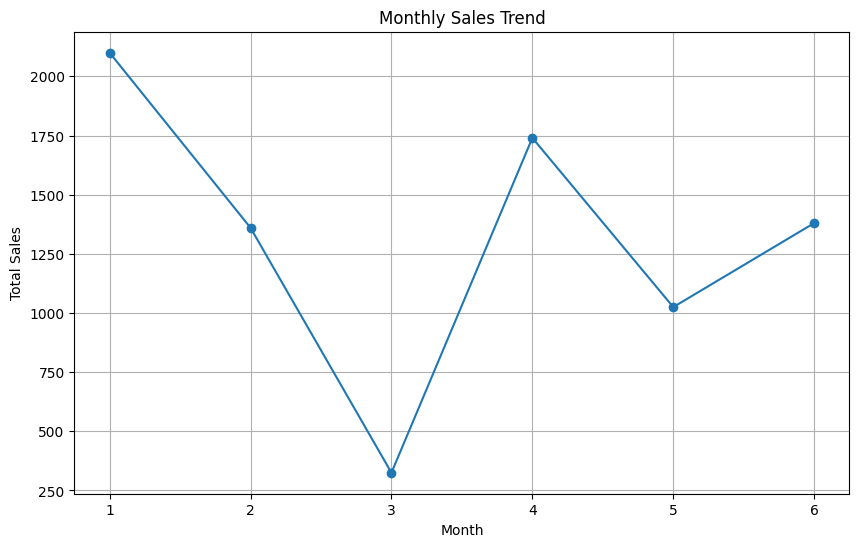

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.xticks(monthly_sales.index)
plt.grid(True)
plt.show()

In [71]:
category_sales = df.groupby('Category')['Total_Amount'].sum().sort_values(ascending=False)

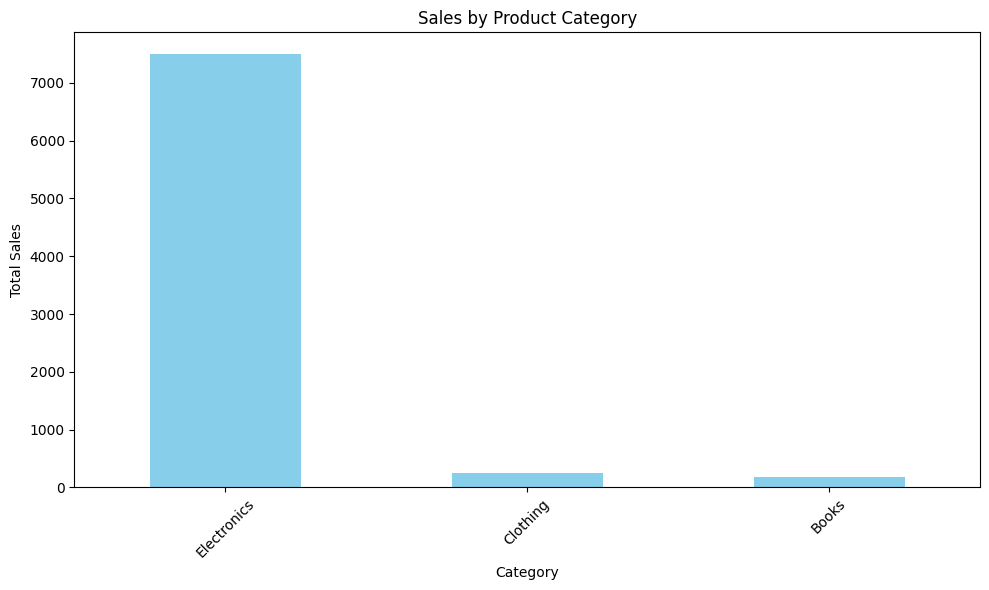

In [72]:
plt.figure(figsize=(10,6))
category_sales.plot(kind='bar', color='skyblue')
plt.title("Sales by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
top_products = df.groupby('Product')['Total_Amount'].sum().sort_values(ascending=False)

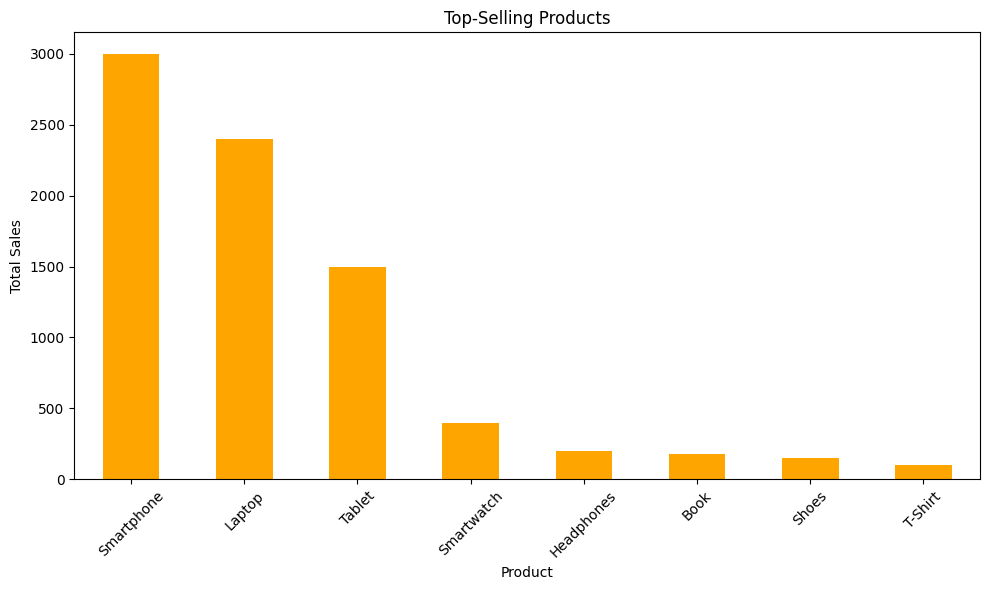

In [74]:
plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color='orange')
plt.title("Top-Selling Products")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
correlation = df[['Quantity', 'Price', 'Total_Amount']].corr()

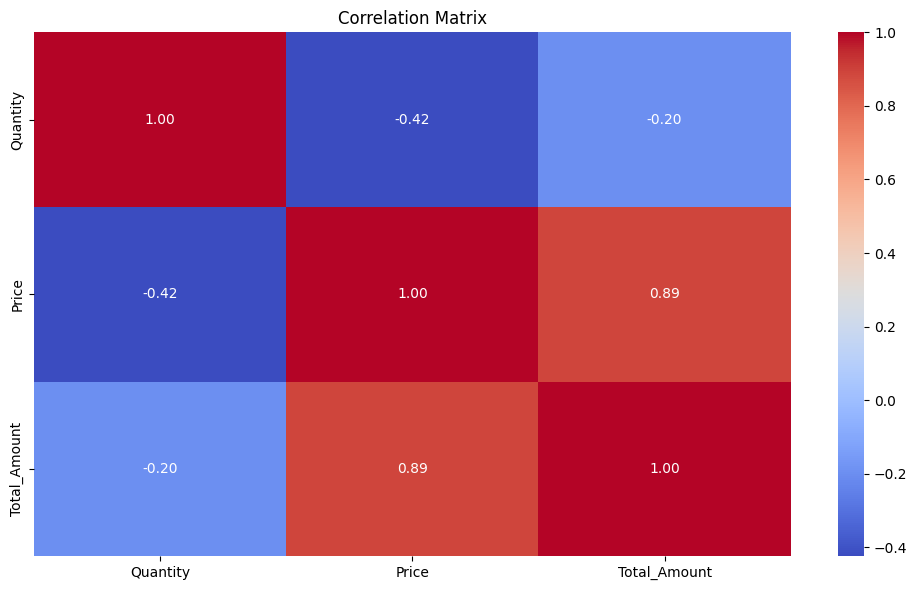

In [76]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [77]:
df.to_excel("cleaned_sales_data.xlsx", index=False)